### 네이버 스포츠 뉴스

In [6]:
import time, nltk
import pandas as pd
from tqdm import tqdm
from konlpy.tag import Okt
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [14]:
url = 'https://sports.news.naver.com/kbaseball/news/index?page=1&date=20230430&isphoto=N'
driver = webdriver.Chrome('C:/Users/yumi5/Downloads/chromedriver')
driver.get(url)
time.sleep(2)

In [8]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('div.news_list > ul > li')
len(lis)

20

In [9]:
li = lis[0]

In [10]:
title = li.select_one('.title').get_text().strip()
title

"안우진 상대로 '파죽의 8연승'...롯데, 11년 만에 선두 등극"

In [11]:
from datetime import datetime
now = datetime.now()
ymd = now.strftime('%Y%m%d')
ymd

'20230501'

In [12]:
events = ['kbaseball', 'wbaseball', 'kfootball', 'wfootball', 'basketball', 'volleyball', 'golf', 'general']
base_url = 'https://sports.news.naver.com/'
sub_url = '/news/index?page='

In [ ]:
event_dict = {}
for event in events:
    url = f'{base_url}{event}{sub_url}1&date=20230430&isphoto=N'
    driver.get(url)
    time.sleep(1)

    next_clicked = 0
    while True:
        try:
            driver.find_element(By.CSS_SELECTOR, '.paginate > .next').click()
            next_clicked += 1
            time.sleep(2)
        except:
            pages = driver.find_elements(By.CSS_SELECTOR, '.paginate > a')
            num_pages = len(pages) + next_clicked * 10 if next_clicked >= 1 else len(pages) + 1
            event_dict[event] = num_pages
            break
event_dict

In [ ]:
sports_title = ''
for event in event_dict.keys():
    for page in range(1, event_dict[event]+1):
        url = f'{base_url}{event}{sub_url}{page}'
        driver.get(url)
        time.sleep(2)

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        lis = soup.select('.news_list > ul > li')
        for li in lis:
            sports_title += li.select_one('.title').get_text().strip() + '\n'

In [13]:
lines = []
for event in events:
    for i in range(1, 30):
        try:
            url = f'{base_url}{event}{sub_url}{i}&date=20230430&isphoto=N'
            driver.get(url)
            time.sleep(2)
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            lis = soup.select('div.news_list > ul > li')

            for li in lis:
                title = li.select_one('.title').get_text().strip()
                lines.append(title)
        except:
            break

In [ ]:
lines

['안세영, 아시아선수권대회 준우승…세계 4위 타이쯔잉에 완패',
 '‘배드민턴 간판’ 안세영, 아시아선수권 여자단식 아쉬운 은메달',
 '남녀노소 참가하는 전국 ‘중대당구대회’ 10월에 열린다',
 '배드민턴 안세영, 아시아개인선수권 준우승…타이쯔잉에 완패',
 '천종원, 스포츠클라이밍 월드컵 2차 대회 볼더링 동메달',
 '이준호 · 류성현, 체조 국가대표로 세계선수권 출전 확정',
 '안세영, 아시아배드민턴선수권서 준우승…대만 타이쯔잉에 완패',
 '천종원, 스포츠클라이밍 월드컵서 유일한 메달',
 '김홍열·김예리, 브레이킹 국가대표 추가 선발',
 '전웅태, 근대5종 ‘세계 챔피언 복귀’',
 '김홍열·김예리 태극마크 단다…2023 브레이킹 K시리즈 2차 대회 우승',
 '서울 스포츠클라이밍 볼더링 \'銅 획득\' 천종원 "코로나 이후 처음 입상…자신감 올라왔다"',
 '배드민턴 안세영, 아시아개인선수권 준우승…타이쯔잉에 완패',
 '천종원, 스포츠클라이밍 서울 월드컵 볼더링 동메달…3년 만에 메달 획득',
 '전웅태, 근대5종 월드컵 시즌 첫 우승…세계 1위 탈환',
 '전웅태, 월드컵 우승…세계 1위 탈환',
 '김홍열과 김예리, 브레이킹 남녀 국가대표 마지막 3번째 막차 탑승…WDSF 월드컵시리즈 등에 출전 자격 얻어',
 '"한계가 없는 예술가"…\'스우파\' 예리, 다시 태극마크 달았다',
 '안권수, AG 예비명단 포함…태극마크 기대감',
 "정윤성, 서울오픈테니스 복식 준우승…'윔블던 우승' 퍼셀에 패",
 "체조협회, AG보다 올림픽 출전권 걸린 세계선수권대회 '올인'",
 "'허를 찔렸다' 안세영, 타이쯔잉에 예상밖 완패. 여복 이소희-백하나도 패배…아시아개인선수권 은메달 2개로 마감",
 "정윤성, 서울오픈테니스 복식 준우승…'윔블던 우승' 퍼셀에 패(종합)",
 "'6세 어린이부터 90세 어르신까지 함께 어우러진 축제의 장' 4년만에 재개된 '2023 전국생활체육대축전', 성황리에 폐막",
 '선산고·일신여고, 종별핸드볼선수권 남녀 

In [ ]:
titles = ' '.join(lines)
titles

'안세영, 아시아선수권대회 준우승…세계 4위 타이쯔잉에 완패 ‘배드민턴 간판’ 안세영, 아시아선수권 여자단식 아쉬운 은메달 남녀노소 참가하는 전국 ‘중대당구대회’ 10월에 열린다 배드민턴 안세영, 아시아개인선수권 준우승…타이쯔잉에 완패 천종원, 스포츠클라이밍 월드컵 2차 대회 볼더링 동메달 이준호 · 류성현, 체조 국가대표로 세계선수권 출전 확정 안세영, 아시아배드민턴선수권서 준우승…대만 타이쯔잉에 완패 천종원, 스포츠클라이밍 월드컵서 유일한 메달 김홍열·김예리, 브레이킹 국가대표 추가 선발 전웅태, 근대5종 ‘세계 챔피언 복귀’ 김홍열·김예리 태극마크 단다…2023 브레이킹 K시리즈 2차 대회 우승 서울 스포츠클라이밍 볼더링 \'銅 획득\' 천종원 "코로나 이후 처음 입상…자신감 올라왔다" 배드민턴 안세영, 아시아개인선수권 준우승…타이쯔잉에 완패 천종원, 스포츠클라이밍 서울 월드컵 볼더링 동메달…3년 만에 메달 획득 전웅태, 근대5종 월드컵 시즌 첫 우승…세계 1위 탈환 전웅태, 월드컵 우승…세계 1위 탈환 김홍열과 김예리, 브레이킹 남녀 국가대표 마지막 3번째 막차 탑승…WDSF 월드컵시리즈 등에 출전 자격 얻어 "한계가 없는 예술가"…\'스우파\' 예리, 다시 태극마크 달았다 안권수, AG 예비명단 포함…태극마크 기대감 정윤성, 서울오픈테니스 복식 준우승…\'윔블던 우승\' 퍼셀에 패 체조협회, AG보다 올림픽 출전권 걸린 세계선수권대회 \'올인\' \'허를 찔렸다\' 안세영, 타이쯔잉에 예상밖 완패. 여복 이소희-백하나도 패배…아시아개인선수권 은메달 2개로 마감 정윤성, 서울오픈테니스 복식 준우승…\'윔블던 우승\' 퍼셀에 패(종합) \'6세 어린이부터 90세 어르신까지 함께 어우러진 축제의 장\' 4년만에 재개된 \'2023 전국생활체육대축전\', 성황리에 폐막 선산고·일신여고, 종별핸드볼선수권 남녀 고등부 우승 [스포츠 영상] 체조 이준호, 종합 배점 1위로 세계선수권 출전 의정부시청 정윤성, 서울오픈 챌린저 복식에서 \'준우승\' 네덜란드行 티켓까

In [ ]:
from PIL import Image 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
sw_wc = STOPWORDS

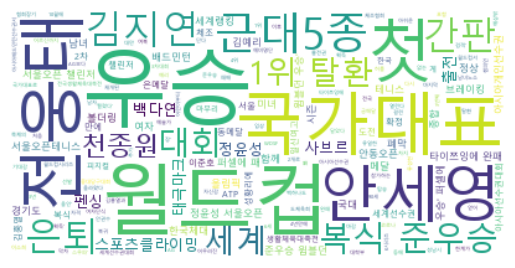

In [ ]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf', relative_scaling=0.2
).generate(titles)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off');